In [18]:
import os
import tarfile
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore

In [19]:
### housing数据集

In [20]:
housing_data = pd.read_csv('housing.csv')

## 数据探索

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


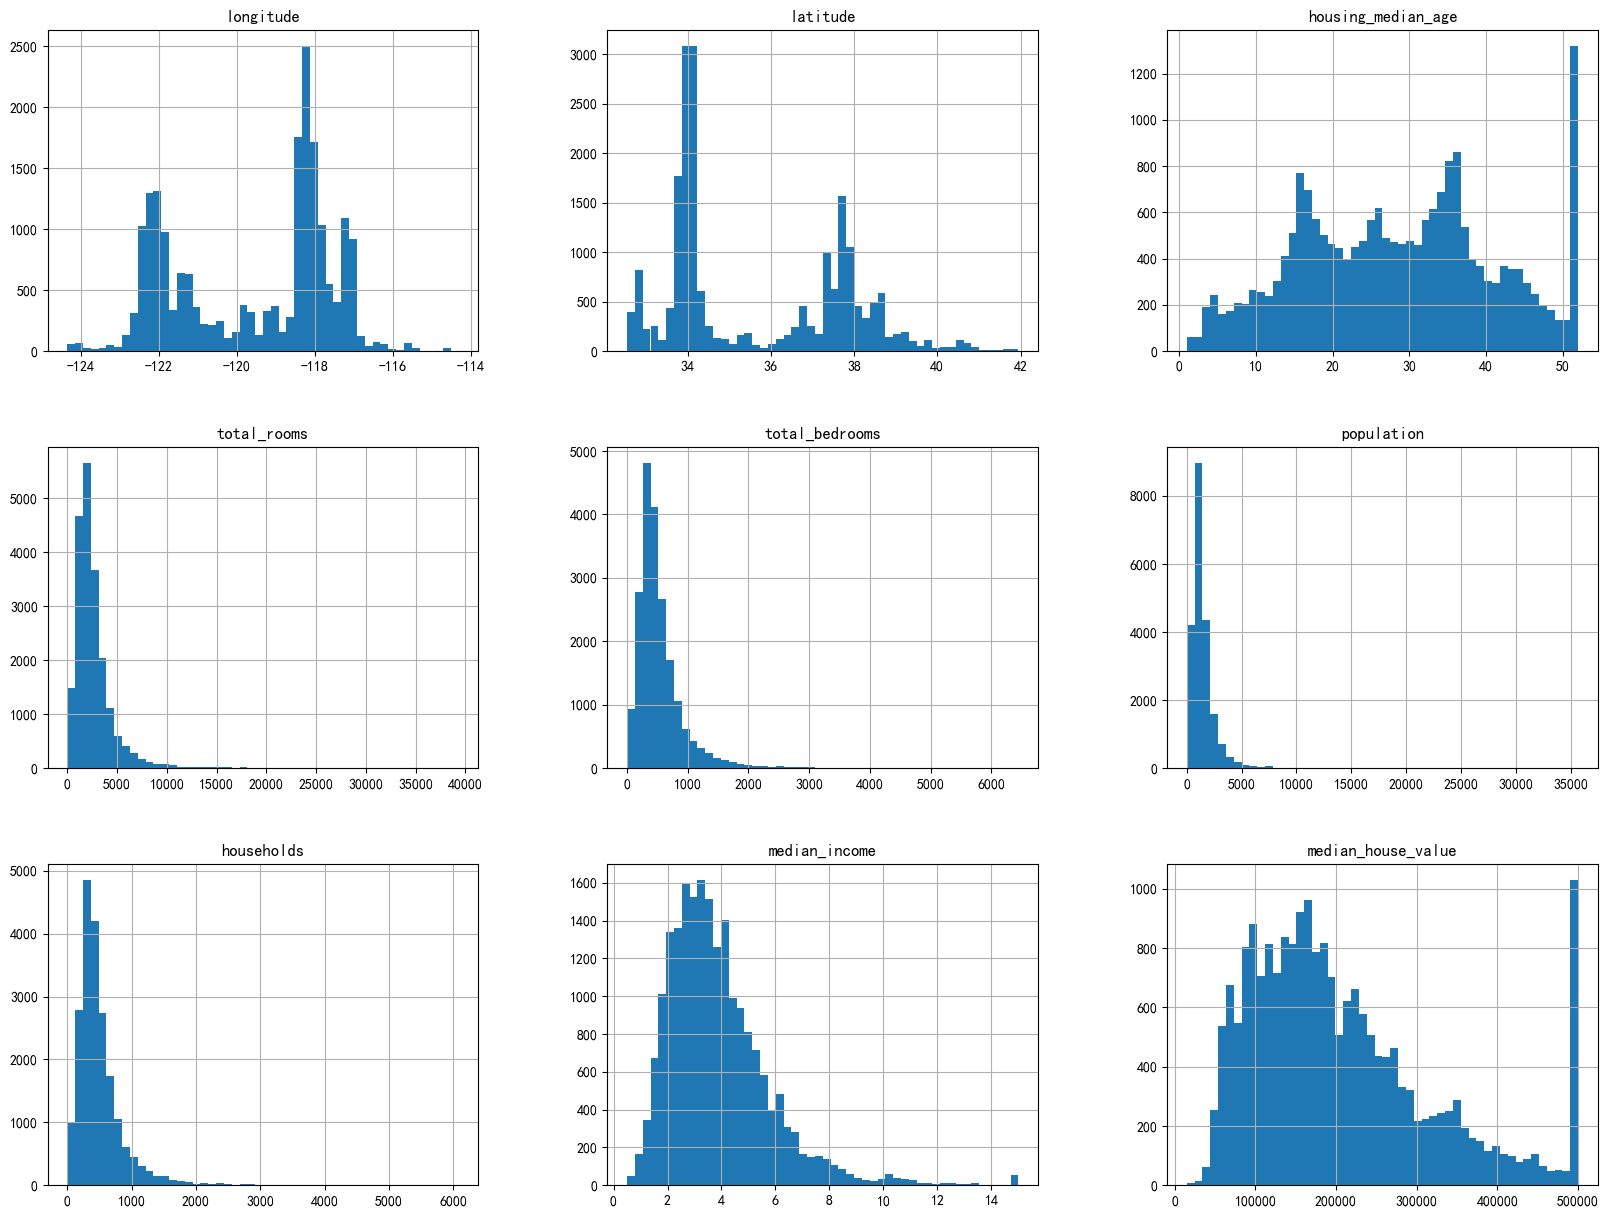

In [21]:
# 显示数据框的前几行
housing_data.head()

# 显示数据框的简要信息
housing_data.info()

# 显示数据框的描述性统计信息
housing_data.describe()

# 为每个数值属性绘制直方图
housing_data.hist(bins=50, figsize=(20, 15))
plt.show()

### 数据集划分

In [22]:
#创建测试集
from sklearn.model_selection import train_test_split # type: ignore

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit # type: ignore

import numpy as np # type: ignore

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)
# 分层抽样
housing_data['income_cat'] = pd.cut(housing_data['median_income'],
                                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels=[1, 2, 3, 4, 5])


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data['income_cat']):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

# 删除income_cat属性，以便数据回到原始状态
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

<Axes: >

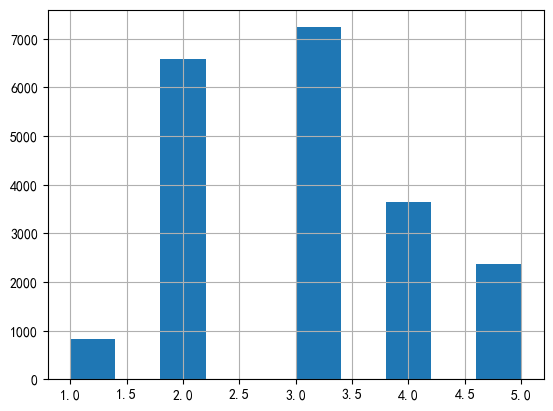

In [24]:
# 根据income_cat数据绘制直方图                   
housing_data["income_cat"].hist()

### 数据可视化

Text(0, 0.5, '纬度')

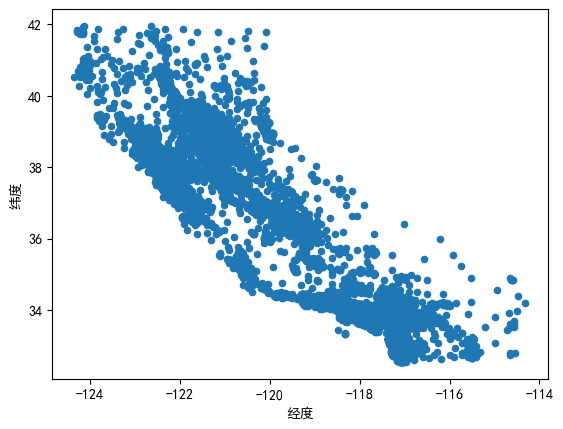

In [25]:
# 显示中文
plt.rcParams['font.family'] = 'SimHei'
# 显示负号
plt.rcParams['axes.unicode_minus'] = False

housing_data.plot(kind="scatter", x="longitude", y="latitude")
plt.xlabel('经度')
plt.ylabel('纬度')


Text(0, 0.5, '纬度')

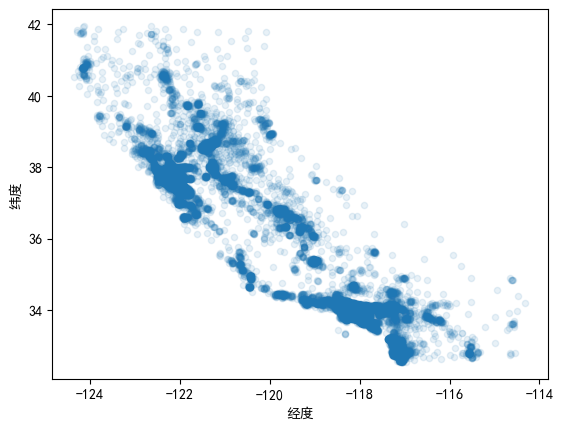

In [26]:
housing_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.xlabel('经度')
plt.ylabel('纬度')

Text(0, 0.5, '纬度')

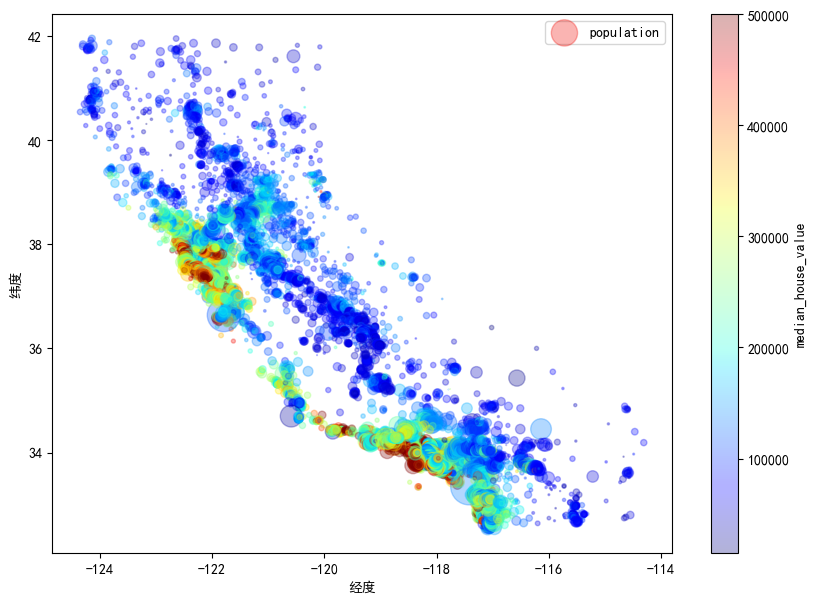

In [27]:
housing_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
             s=housing_data["population"]/50, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.xlabel('经度')
plt.ylabel('纬度')


### 寻找相关性

In [28]:
# 皮尔逊相关系数
corr_matrix = housing_data.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

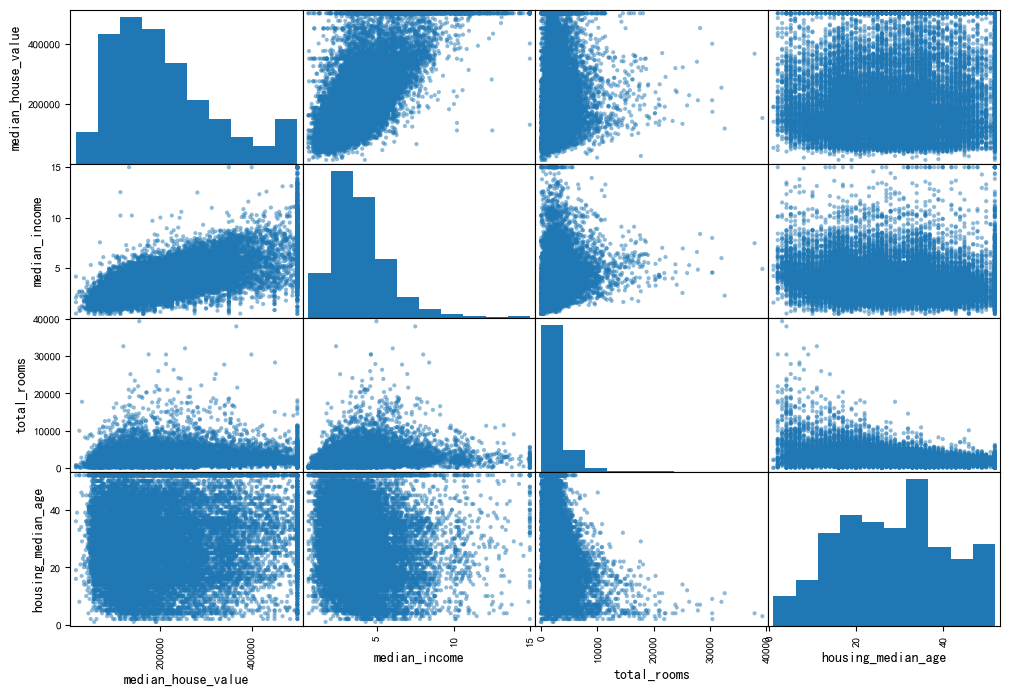

In [29]:
from pandas.plotting import scatter_matrix # type: ignore

# 散点矩阵图
# 选择要绘制散点矩阵的属性
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

# 绘制散点矩阵
scatter_matrix(housing_data[attributes], figsize=(12, 8))

### 数据缺失值处理

In [30]:
housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data["population_per_household"]=housing_data["population"]/housing_data["households"] 
corr_matrix = housing_data.corr(numeric_only = True)   # 计算属性之间的相关性
corr_matrix["median_house_value"].sort_values(ascending=False)  # 查看与房价中位数的相关性    

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [50]:
#删除

# 未使用前两个方法

housing = strat_train_set.drop("median_house_value", axis=1)  # 创建一个不包含 'median_house_value' 列的 DataFrame

housing_labels = strat_train_set["median_house_value"].copy()  # 创建一个只包含 'median_house_value' 列的 Series 

housing.dropna(subset=["total_bedrooms"])  #删除 housing_data DataFrame 中 'total_bedrooms' 列存在缺失值 (NaN) 的行。注意到未使用此方法

housing.drop("total_bedrooms", axis=1)  #删除 housing_data DataFrame 中 'total_bedrooms' 列   

median = housing["total_bedrooms"].median()  #计算 'total_bedrooms' 列的中位数

housing["total_bedrooms"].fillna(median, inplace=True)  #用中位数填充 'total_bedrooms' 列中的缺失值

housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [32]:
#数据填补

from sklearn.impute import SimpleImputer # type: ignore 

imputer = SimpleImputer(strategy="median")  #创建一个 SimpleImputer 实例，指定用中位数填充缺失值
                                                                                                                                                                                                                                                                                                                                                                                                            
housing_num = housing.drop("ocean_proximity", axis=1)  #创建一个不包含文本属性 'ocean_proximity' 的数据副本

imputer.fit(housing_num)  #使用 fit() 方法将 imputer 实例适配到训练数据

imputer.statistics_  #查看每个属性的中位数

housing_num.median().values  #与 imputer.statistics_ 相同

X = imputer.transform(housing_num)  #使用训练好的 imputer 对训练集进行转换，将缺失值替换为中位数

housing_tr  = pd.DataFrame(X, columns=housing_num.columns)  #将转换后的 NumPy 数组转换回 DataFrame


####   文本处理

In [33]:
housing_cat = housing[["ocean_proximity"]]  #创建一个只包含文本属性 'ocean_proximity' 的 DataFrame

from sklearn.preprocessing import OrdinalEncoder # type: ignore 

ordinal_encoder = OrdinalEncoder()  #创建一个 OrdinalEncoder 实例

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)  #使用 fit_transform() 方法将文本分类转换为整数分类

print(housing_cat_encoded[:10] )  #查看分类

ordinal_encoder.categories_  #查看分类

[[1.]
 [4.]
 [1.]
 [4.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]]


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [34]:
from sklearn.preprocessing import OneHotEncoder # type: ignore

cat_encoder = OneHotEncoder()  #创建一个 OneHotEncoder 实例

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)  #使用 fit_transform() 方法将整数分类转换为独热编码

housing_cat_1hot.toarray()  #查看独热编码   

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

#### 自定义转换器

In [56]:
from sklearn.compose import ColumnTransformer # type: ignore
from sklearn.pipeline import Pipeline # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore

num_attribs = list(housing_num)  #获取数值属性的列名
cat_attribs = ["ocean_proximity"]  #获取文本属性的列名

full_pipeline = ColumnTransformer([  #创建一个 ColumnTransformer 实例
        ("num", StandardScaler(), num_attribs),  #数值属性的转换器
        ("cat", OneHotEncoder(), cat_attribs),  #文本属性的转换器
    ])      

housing_prepared = full_pipeline.fit_transform(housing)  #使用 fit_transform() 方法将数据集转换为适用于机器学习算法的形式

##  选择并训练模型

### 训练并评估模型

##### 线性回归

In [71]:
from sklearn.linear_model import LinearRegression # type: ignore

lin_reg = LinearRegression()  #创建一个 LinearRegression 实例

lin_reg.fit(housing_prepared, housing_labels)  #使用 fit() 方法将模型适配到训练数据

some_data = housing.iloc[:5]  #获取前 5 行数据  

some_labels = housing_labels.iloc[:5]  #获取前 5 行标签

some_data_prepared = full_pipeline.transform(some_data)  #使用 transform() 方法将数据集转换为适用于机器学习算法的形式

print("Predictions:", lin_reg.predict(some_data_prepared))  #进行预测

print("Labels:", list(some_labels))  #查看标签

Predictions: [ 88983.14806384 305351.35385026 153334.71183453 184302.55162102
 246840.18988841]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [72]:
from sklearn.metrics import mean_squared_error # type: ignore

housing_predictions = lin_reg.predict(housing_prepared)  #进行预测

lin_mse = mean_squared_error(housing_labels, housing_predictions)  #计算均方误差

lin_rmse = np.sqrt(lin_mse)  #计算均方根误差

lin_rmse  #查看均方根误差

69050.56219504567

#### 决策树

In [80]:
# 决策树回归

from sklearn.tree import DecisionTreeRegressor # type: ignore

tree_reg = DecisionTreeRegressor()  #创建一个 DecisionTreeRegressor 实例

tree_reg.fit(housing_prepared, housing_labels)  #使用 fit() 方法将模型适配到训练数据

housing_predictions = tree_reg.predict(housing_prepared)  #进行预测

tree_mse = mean_squared_error(housing_labels, housing_predictions)  #计算均方误差

tree_rmse = np.sqrt(tree_mse)  #计算均方根误差

tree_rmse  #查看均方根误差

0.0

In [ ]:
# 交叉验证模型评估

from sklearn.model_selection import cross_val_score # type: ignore

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,  #使用交叉验证评估决策树模型
                            scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)  #计算均方根误差

def display_scores(scores):  #定义一个函数，用于显示评分
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)  #显示评分


Scores: [70336.56775445 70102.98871952 65120.48772967 68450.68193481
 68339.90686664 67721.59259064 71188.61180977 69250.68324408
 66090.97132295 72820.80548837]
Mean: 68942.3297460902
Standard deviation: 2197.8630372190564


In [ ]:
# 线性回归模型的交叉验证评分

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,  #使用交叉验证评估线性回归模型
                                scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)  #计算均方根误差

display_scores(lin_rmse_scores)  #显示评分



Scores: [72229.03469752 65318.2240289  67706.39604745 69368.53738998
 66767.61061621 73003.75273869 70522.24414582 69440.77896541
 66930.32945876 70756.31946074]
Mean: 69204.32275494763
Standard deviation: 2372.0707910559204


In [76]:
# 随机森林回归

from sklearn.ensemble import RandomForestRegressor # type: ignore

forest_reg = RandomForestRegressor()  #创建一个 RandomForestRegressor 实例

forest_reg.fit(housing_prepared, housing_labels)  #使用 fit() 方法将模型适配到训练数据

housing_predictions = forest_reg.predict(housing_prepared)  #进行预测

forest_mse = mean_squared_error(housing_labels, housing_predictions)  #计算均方误差

forest_rmse = np.sqrt(forest_mse)  #计算均方根误差

print(forest_rmse)  #查看均方根误差


18449.045287843695


In [ ]:
# 网格搜索

from sklearn.model_selection import GridSearchCV # type: ignore

param_grid = [  #定义一个参数网格
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()  #创建一个 RandomForestRegressor 实例

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,  #创建一个 GridSearchCV 实例
                            scoring='neg_mean_squared_error',
                            return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)  #使用 fit() 方法将模型适配到训练数据

grid_search.best_params_  #查看最佳参数

{'max_features': 8, 'n_estimators': 30}

In [78]:
grid_search.best_estimator_  #查看最佳估计器

RandomForestRegressor(max_features=8, n_estimators=30)

In [79]:
cvres = grid_search.cv_results_  #网格搜索的结果
for mean_socre, params in zip(cvres["mean_test_score"], cvres["params"]):  #查看评分
    print(np.sqrt(-mean_socre), params)

63729.19227697188 {'max_features': 2, 'n_estimators': 3}
55441.99997737323 {'max_features': 2, 'n_estimators': 10}
52475.03920891281 {'max_features': 2, 'n_estimators': 30}
60309.083681692566 {'max_features': 4, 'n_estimators': 3}
52860.90634044334 {'max_features': 4, 'n_estimators': 10}
50583.63551102851 {'max_features': 4, 'n_estimators': 30}
58568.4741132057 {'max_features': 6, 'n_estimators': 3}
52624.8279764731 {'max_features': 6, 'n_estimators': 10}
50175.563961206644 {'max_features': 6, 'n_estimators': 30}
58442.14170451846 {'max_features': 8, 'n_estimators': 3}
52055.21076540519 {'max_features': 8, 'n_estimators': 10}
50026.21726226794 {'max_features': 8, 'n_estimators': 30}
62171.204659346964 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53936.66196935136 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59697.25879509881 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52683.891198607256 {'bootstrap': False, 'max_features': 3, 'n_estimators': 